## Shape-diff VAE Free Generation

1359 0
cond_obj: 
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_single_surface [LEAF] {3}
  ├1 chair_seat    {4}
  |  ├0 seat_surface    {5}
  |  |  ├0 seat_single_surface [LEAF] {6}
  ├2 chair_base    {7}
  |  ├0 regular_leg_base    {8}
  |  |  ├0 leg [LEAF] {9}
  |  |  ├1 leg [LEAF] {10}
  |  |  ├2 leg [LEAF] {11}
  |  |  ├3 leg [LEAF] {12}

diff: 
0 [DiffNode: SAME] 
  ├0 [DiffNode: SAME] 
  |  ├0 [DiffNode: SAME] 
  |  |  ├0 [DiffNode: DEL] 
  |  ├1 [DiffNode: ADD] 
  |  |  ├0 back_frame    {0}
  |  |  |  ├0 back_frame_vertical_bar [LEAF] {0}
  |  |  |  ├1 back_frame_vertical_bar [LEAF] {0}
  |  |  |  ├2 back_frame_horizontal_bar [LEAF] {0}
  ├1 [DiffNode: SAME] 
  |  ├0 [DiffNode: SAME] 
  |  |  ├0 [DiffNode: LEAF] 
  ├2 [DiffNode: SAME] 
  |  ├0 [DiffNode: SAME] 
  |  |  ├0 [DiffNode: LEAF] 
  |  |  ├1 [DiffNode: LEAF] 
  |  |  ├2 [DiffNode: LEAF] 
  |  |  ├3 [DiffNode: LEAF] 



<IPython.core.display.Javascript object>


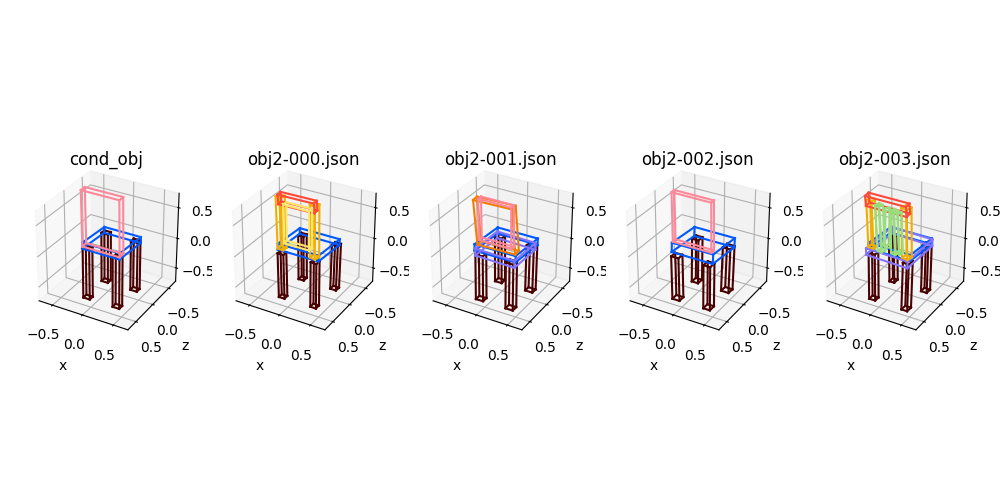

In [5]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/exp_vae_chair_cd_editgen'
obj_idx = 2

# read all data
obj_list = sorted([item for item in os.listdir(root_dir) if '.' not in item])

# visualize one data
anno_id = obj_list[obj_idx]
gen_id = 0
num_visu = 4
print(anno_id, gen_id)

cond_obj = PartNetDataset.load_object(os.path.join(root_dir, anno_id, 'cond_obj.json'))
print('cond_obj: ')
print(cond_obj)

print('diff: ')
with open(os.path.join(root_dir, anno_id, 'diff-%03d.txt' % gen_id), 'r') as fin:
    print(''.join(fin.readlines()))

objects = [cond_obj]
object_names = ['cond_obj']
for i in range(num_visu):
    obj2 = PartNetDataset.load_object(os.path.join(root_dir, anno_id, 'obj2-%03d.json' % (gen_id + i)))
    objects.append(obj2)
    object_names.append('obj2-%03d.json' % (gen_id + i))
    
draw_partnet_objects(objects=objects, object_names=object_names, 
                     figsize=(10, 5), leafs_only=True, visu_edges=False,
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')